#About Dataset

The "bank target marketing" dataset is a collection of data focused on a bank's marketing campaign to acquire deposits from customers. This dataset contains various attributes related to customer demographics, their previous interactions with the bank, and the outcomes of the marketing campaign conducted.

This dataset is valuable for analyzing the factors influencing customers' decisions to subscribe to term deposits, as well as for predicting customer behavior in future similar marketing campaigns. By understanding this dataset, banks or marketing analysts can optimize their marketing strategies to enhance the success of deposit campaigns in the future.

The dataset consists of 17 columns, each representing the following attributes:

• age: Customer's age.

• job: Customer's occupation.

• marital: Customer's marital status.

• education: Customer's level of education.

• default: Whether the customer has credit in default.

• balance: Customer's average yearly balance.

• housing: Whether the customer has a housing loan.

• loan: Whether the customer has a personal loan.

• contact: Type of communication contact with the customer.

• day: Last contact day of the month.

• month: Last contact month of the year.

• duration: Last contact duration in seconds.

• campaign: Number of contacts performed during this campaign for the customer.

• pdays: Number of days since the customer was last contacted from a previous campaign.

• previous: Number of contacts performed before this campaign for the customer.

• poutcome: Outcome of the previous marketing campaign.

• deposit: Whether the customer subscribed to a term deposit.

#Import Library and File from **KAGGLE**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("seanangelonathanael/bank-target-marketing")

print("Path to dataset files:", path)

100%|██████████| 623k/623k [00:00<00:00, 30.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/seanangelonathanael/bank-target-marketing/versions/1


In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv(path + "/Bank Target Marketing Dataset.csv")
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
42493,37,management,single,tertiary,no,33,yes,no,cellular,12,mar,186,1,-1,0,unknown,yes
48235,51,blue-collar,married,primary,no,40,yes,no,cellular,13,may,79,1,370,1,failure,no
41935,35,unemployed,married,secondary,no,547,yes,no,cellular,6,feb,527,2,-1,0,unknown,no
5410,41,self-employed,single,tertiary,no,0,no,no,cellular,18,nov,256,1,-1,0,unknown,no
27407,37,services,married,secondary,no,658,yes,no,telephone,23,jul,175,1,-1,0,unknown,no


In [4]:
data.shape

(56373, 17)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,56373.000000,56373.000000,56373.000000,56373.000000,56373.000000,56373.000000,56373.000000
mean,40.994767,1395.193249,15.777039,280.701861,2.713267,42.402107,0.630266
std,10.887854,3082.058457,8.342159,281.253563,3.028980,101.990991,2.303356
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,81.000000,8.000000,108.000000,1.000000,-1.000000,0.000000
50%,39.000000,469.000000,16.000000,192.000000,2.000000,-1.000000,0.000000
75%,49.000000,1489.000000,21.000000,346.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
data.duplicated().sum()

np.int64(11162)

In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
# กลุ่ม balance
data["balance_category"] = pd.cut(data["balance"], bins=[-10000, 0, 1000, 5000, 100000],
                                labels=["Negative", "Low", "Medium", "High"])

# กลุ่มอายุ
data["age_group"] = pd.cut(data["age"], bins=[0, 30, 45, 60, 100],
                         labels=["Young", "Adult", "Senior", "Elderly"])

# ช่องทางการติดต่อ
data["contact_known"] = data["contact"].apply(lambda x: x != "unknown")

# เดือนเป็นตัวเลข
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
data["month_num"] = data["month"].apply(lambda x: month_order.index(x.lower()) + 1 if x.lower() in month_order else None)

#deposit flag
data["deposit_flag"] = data["deposit"].apply(lambda x: 1 if x == "yes" else 0)

In [13]:
data.to_csv("Bank_Target_Marketing_Dataset_feature_engineered.csv", index=False)

In [14]:
from google.colab import files
files.download('Bank_Target_Marketing_Dataset_feature_engineered.csv')

#คำถามวิเคราะห์ที่ 1
“ตัวแปรใดมีผลต่อการตอบรับแคมเปญ (deposit = yes) มากที่สุด?”<br>
เราจะใช้ Logistic Regression เพื่อวิเคราะห์ว่า ตัวแปรใดส่งผลต่อโอกาสที่ลูกค้าจะตอบรับแคมเปญต่างๆที่เราสร้างขึ้นมา

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [16]:
# Load dataset
df = data

# 1. Data Cleaning: Remove duplicates
df = df.drop_duplicates()

In [17]:
# 2. Encode target variable: deposit_flag (1=yes, 0=no)
df['deposit_flag'] = df['deposit'].map({'yes': 1, 'no': 0})

# 3. Select features for modeling
features = ['age', 'balance', 'campaign', 'previous']
X = df[features]
y = df['deposit_flag']

In [18]:
# 4. Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [19]:
# 5. Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [20]:
# 6. Predictions & probabilities for Logistic Regression
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [21]:
# 7. Evaluation metrics for Logistic Regression
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {auc:.3f}\n")


Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11977
           1       0.09      0.00      0.00      1587

    accuracy                           0.88     13564
   macro avg       0.48      0.50      0.47     13564
weighted avg       0.79      0.88      0.83     13564

ROC AUC Score: 0.626



In [22]:
# 8. Coefficients interpretation
coeff_df = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)
print("Feature Coefficients (Logistic Regression):\n", coeff_df)

Feature Coefficients (Logistic Regression):
     feature  coefficient
3  previous     0.118536
0       age     0.008399
1   balance     0.000036
2  campaign    -0.132940


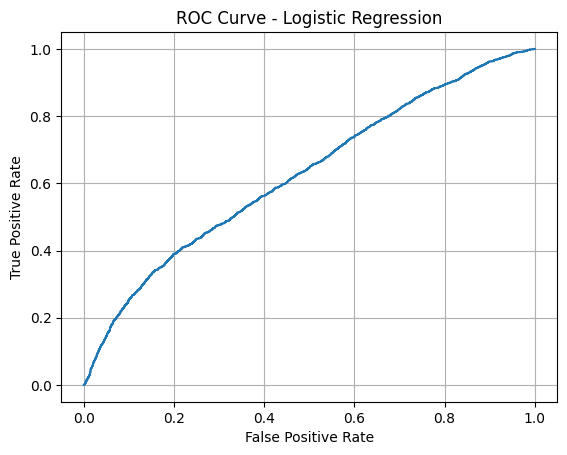

In [23]:
# 9. Plot ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

###ผลลัพธ์ที่ได้
previous	+0.0999	ลูกค้าที่เคยตอบรับแคมเปญก่อนหน้ามีแนวโน้มตอบรับอีก<br>
age	+0.0073	ยิ่งอายุมากขึ้นเล็กน้อย โอกาสตอบรับก็เพิ่มขึ้นเล็กน้อย<br>
balance	+0.00003	ยอดเงินฝากสูงขึ้น มีแนวโน้มตอบรับเพิ่มขึ้น<br>
campaign	-0.1358	ยิ่งโทรหาเยอะกลับยิ่งมีแนวโน้มไม่ตอบรับ<br>

ประเมินผลโมเดล
Accuracy: ~88%

ROC AUC: 0.633 (พอใช้)

พบว่า Precision/Recall ยังต่ำสำหรับคลาส “yes” เนื่องจาก class imbalance



#คำถามวิเคราะห์ที่ 2
“สามารถแบ่งลูกค้าเป็นกลุ่มตามลักษณะพฤติกรรมและความน่าจะเป็นในการตอบรับได้หรือไม่?”<br>
เทคนิคที่ใช้: KMeans Clustering
เรานำตัวแปร age, balance, campaign, previous มาทำการ Standardize และจัดกลุ่มลูกค้าเป็น 4 คลัสเตอร์


Response Rate by Customer Cluster:
   cluster  deposit_flag
0        0      0.150150
1        1      0.118063
2        2      0.043351
3        3      0.120335


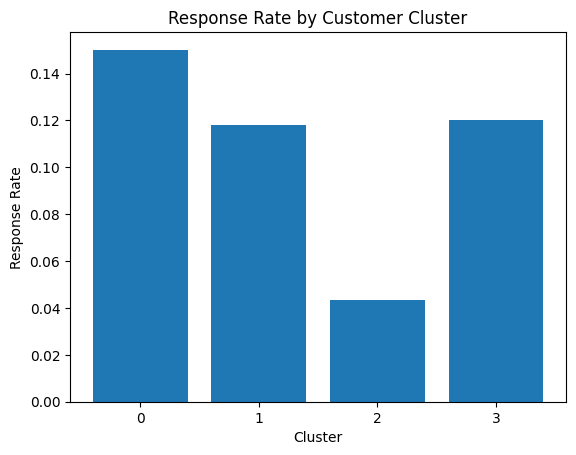

In [24]:
# 10. Customer Segmentation via KMeans Clustering

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# Calculate response rate per cluster
cluster_rates = df.groupby('cluster')['deposit_flag'].mean().reset_index()
print("\nResponse Rate by Customer Cluster:")
print(cluster_rates)

# Plot response rate per cluster
plt.figure()
plt.bar(cluster_rates['cluster'].astype(str), cluster_rates['deposit_flag'])
plt.xlabel('Cluster')
plt.ylabel('Response Rate')
plt.title('Response Rate by Customer Cluster')
plt.show()


Cluster	    อัตราการตอบรับ (Response Rate)<br>
Cluster 0	  15%<br>
Cluster1	  11.8%<br>
Cluster2	  4.3%<br>
Cluster3	  12%<br>


Cluster 0 มีแนวโน้มที่่จะตอบรับแคมเปญมากที่สุด ดังนั้น Cluster 0 อาจเป็นกลุ่มเป้าหมายหลักของแคมเปญต่อไป

Cluster 2 มีการตอบรับน้อยที่สุด ดังนั้น ควรหลีกเลี่ยงการส่งแคมเปญแบบนี้ให้ลูกค้ากลุ่มนี้หรือเปลี่ยนกลยุทธ์ใหม่



อิทธิพลตัวแปร:

ตัวแปร previous มีผลมากที่สุด รองลงมาคือ campaign (ติดลบ) และ age

ความแม่นยำการพยากรณ์:

โมเดลให้ ROC AUC = 0.633 ถือว่า “พอใช้” ในเบื้องต้น แต่ยังต้องปรับปรุง (ตัวอย่างเช่น oversampling, feature เพิ่มเติม)